In [17]:
from typing_extensions import TypedDict
from typing import Literal

class TypedDictState(TypedDict):
    name:str
    game:Literal["cricket","badminton"]

In [18]:
def play_game(state:TypedDictState):
    print("---Play Game node has been called--")
    return {"name":state['name'] + " want to play "}
def cricket(state:TypedDictState):
    print("-- Cricket node has been called--")
    return {"name":state["name"] + " cricket","game":"cricket"}
def badminton(state:TypedDictState):
    print("-- badminton node has been called--")
    return {"name":state["name"] + " badminton","game":"badminton"}

In [19]:
import random
def decide_play(state:TypedDictState)->Literal["cricket","badminton"]:
    # Here, let's just do a 50 / 50 split between nodes 2, 3
    if random.random() < 0.5:
        return "cricket"
    else:
        return "badminton"

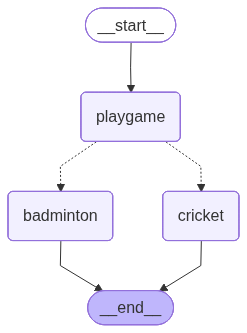

In [20]:
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END
builder=StateGraph(TypedDictState)
builder.add_node("playgame",play_game)
builder.add_node("cricket",cricket)
builder.add_node("badminton",badminton)
## Flow of the graph
builder.add_edge(START,"playgame")
builder.add_conditional_edges("playgame",decide_play)
builder.add_edge("cricket",END)
builder.add_edge("badminton",END)
# Add
graph = builder.compile()
# View
display(Image(graph.get_graph().draw_mermaid_png()))

In [21]:
graph.invoke({"name":"Sowmya"})

---Play Game node has been called--
-- Cricket node has been called--


{'name': 'Sowmya want to play  cricket', 'game': 'cricket'}

In [22]:
graph.invoke({"name":"123"})

---Play Game node has been called--
-- badminton node has been called--


{'name': '123 want to play  badminton', 'game': 'badminton'}

In [23]:
### DataClasses
from dataclasses import dataclass
@dataclass
class DataClassState:
     name:str
     game:Literal["badminton","cricket"]

In [24]:
def play_game(state:DataClassState):
    print("---Play Game node has been called--")
    return {"name":state.name + " want to play "}
def cricket(state:DataClassState):
    print("-- Cricket node has been called--")
    return {"name":state.name + " cricket","game":"cricket"}
def badminton(state:DataClassState):
    print("-- badminton node has been called--")
    return {"name":state.name + " badminton","game":"badminton"}

In [25]:
import random
def decide_play(state:DataClassState)->Literal["cricket","badminton"]:
     # Here, let's just do a 50 / 50 split between nodes 2, 3
    if random.random() < 0.5:
        return "cricket"
    else:
        return "badminton"

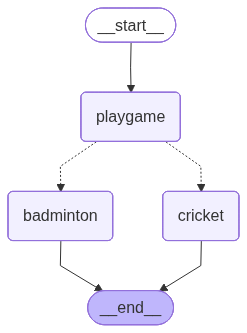

In [26]:
builder=StateGraph(DataClassState)
builder.add_node("playgame",play_game)
builder.add_node("cricket",cricket)
builder.add_node("badminton",badminton)
## Flow of the graph
builder.add_edge(START,"playgame")
builder.add_conditional_edges("playgame",decide_play)
builder.add_edge("cricket",END)
builder.add_edge("badminton",END)
# Add
graph = builder.compile()
# View
display(Image(graph.get_graph().draw_mermaid_png()))

In [29]:
graph.invoke(DataClassState(name="Sowmya",game="cricket"))

---Play Game node has been called--
-- Cricket node has been called--


{'name': 'Sowmya want to play  cricket', 'game': 'cricket'}